# The Binance API

# Order book data charts

## Introduction

Hallo data miners! ⛏

The second episode of this chapter regarding the Binance API will explore just one, always useful, info you can retrieve: the Order Book. If you read these articles, you are probably very familiar with the concept of Order Book so I will not bother you with all the usual boiler-plate introduction on: what is an Order Book? How Orders are matched in Finance? and bla and bla and bla.

I do not have to rank on Google so I will keep my posts as I think it's better: concise. Very few concepts per article, some small examples and max 5 minutes read. 





In [17]:
import json
import requests

r = requests.get("https://api.binance.com/api/v3/depth",params=dict(symbol="LUNABUSD"))
response = r.json()
response

{'lastUpdateId': 1557213622,
 'bids': [['3.11420000', '6.41000000'],
  ['3.11370000', '45.58000000'],
  ['3.11120000', '18.39000000'],
  ['3.11100000', '32.90000000'],
  ['3.11040000', '52.85000000'],
  ['3.11000000', '11.32000000'],
  ['3.10980000', '3.23000000'],
  ['3.10890000', '148.85000000'],
  ['3.10880000', '61.40000000'],
  ['3.10750000', '184.37000000'],
  ['3.10660000', '34.28000000'],
  ['3.10620000', '65.84000000'],
  ['3.10610000', '185.32000000'],
  ['3.10600000', '995.63000000'],
  ['3.10500000', '10.09000000'],
  ['3.10490000', '32.17000000'],
  ['3.10470000', '102.84000000'],
  ['3.10430000', '34.28000000'],
  ['3.10420000', '75.57000000'],
  ['3.10320000', '250.00000000'],
  ['3.10310000', '461.35000000'],
  ['3.10300000', '594.24000000'],
  ['3.10150000', '64.42000000'],
  ['3.10100000', '182.21000000'],
  ['3.10070000', '1338.70000000'],
  ['3.10060000', '196.85000000'],
  ['3.10050000', '161.10000000'],
  ['3.10030000', '161.11000000'],
  ['3.10000000', '1134.4400

Let's just construct the bid and ask DataFrames by reading the "bid"/"ask" key of the response. Using the pandas method ```from_records``` the corresponding list can be transformed into a DataFrame with a snap! 

As the name suggests, with the method ```concat``` we can concatenate the two DataFrames.

In [18]:
import pandas as pd

# define the bid/ask datframes by reading the bid/ask keys of the response
# and the pandas constructor method from_records. Add also a column "side".
df_bid = pd.DataFrame.from_records(response['bids'], columns=['price', 'quantity']).astype('float')
df_bid['side'] = 'bid'

df_ask = pd.DataFrame.from_records(response['asks'], columns=['price', 'quantity']).astype('float')
df_ask['side'] = 'ask'

# concatenate the dataframes
# for the bid we first sort the dataframe in ascending order
# then we select the last 5 rows of bid and the first five of ask
df = pd.concat([df_bid.sort_values(by=['price'])[-5:], df_ask[:5]], ignore_index=True)
df

,price,quantity,side
0,3.1104,52.85,bid
1,3.1110,32.90,bid
2,3.1112,18.39,bid
3,3.1137,45.58,bid
4,3.1142,6.41,bid
5,3.1186,43.73,ask
6,3.1188,218.80,ask
7,3.1189,320.90,ask
8,3.1192,99.26,ask
9,3.1200,281.68,ask


## I try the same with figure widget

### Order Book

In [102]:
import plotly.graph_objects as go


fig = go.Figure()
for df,color in zip([df_bid[0:20],df_ask[:20]],['forestgreen','firebrick']): 
    fig.add_trace(go.Bar(x=df['price'],y=df['quantity'],marker=dict(color=color))) #size=0.001*df['quantity']

fig.update_xaxes(showgrid=False, 
                zeroline=False, 
                title ='Price' ,
                titlefont=dict(family='Rockwell', color='grey', size=14),
                tickfont=dict(family='Rockwell', color='grey', size=14))

fig.update_yaxes(showgrid=False, 
                zeroline=False, 
                title = 'Quantity', 
                titlefont=dict(family='Rockwell', color='grey', size=14), 
                tickfont=dict(family='Rockwell', color='grey', size=14))

fig.update_layout(showlegend=False, plot_bgcolor='#2d2d2d', paper_bgcolor='#2d2d2d')

fig.show()


FigureWidget({
    'data': [{'marker': {'color': 'forestgreen'},
              'type': 'bar',
              'u…

### Imbalance Calculation

In [73]:
df_bid['depth_volume']=df_bid.cumsum().quantity
df_ask['depth_volume']=df_ask.cumsum().quantity
df_ask

rho = (df_bid['depth_volume']-df_ask['depth_volume'])/(df_bid['depth_volume']+df_ask['depth_volume'])

### Imbalance Plot

In [103]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=rho.index[0:10],y=rho[0:10],marker=dict(color='firebrick')))

fig1.update_xaxes(showgrid=False, 
                zeroline=False, 
                title ='Imbalance' ,
                titlefont=dict(family='Rockwell', color='grey', size=14),
                tickfont=dict(family='Rockwell', color='grey', size=14))

fig1.update_yaxes(showgrid=False, 
                zeroline=False, 
                title = 'Depth', 
                titlefont=dict(family='Rockwell', color='grey', size=14), 
                tickfont=dict(family='Rockwell', color='grey', size=14))

fig1.update_layout(showlegend=False, plot_bgcolor='#2d2d2d', paper_bgcolor='#2d2d2d')

fig1.show()

FigureWidget({
    'data': [{'marker': {'color': 'firebrick'},
              'type': 'bar',
              'uid…

### Put together in Widget hBox

In [104]:
%%html
<style>
    .box_style{
        width:100%;
        border : 0px solid red;
        height: auto;
        background-color:#373737;
    }
</style>

In [105]:
from ipywidgets import Layout
import ipywidgets as widgets


fwidg = go.FigureWidget(fig)
fwidg1 = go.FigureWidget(fig1)


# this is an horizontal box holding the table widget
# with some Layout an the CSS style we defined before
hBox = widgets.HBox([fwidg,fwidg1],layout=Layout(justify_content= 'center'))
hBox.add_class("box_style")

# draw the horizontal Box
hBox

    'data': [{'marker': {'color': 'forestgreen'},
              'type': 'bar',
 …

### Update Live

In [106]:
def calculate_imbalance(df_bid,df_ask):
    df_bid['depth_volume']=df_bid.cumsum().quantity
    df_ask['depth_volume']=df_ask.cumsum().quantity

    return (df_bid['depth_volume']-df_ask['depth_volume'])/(df_bid['depth_volume']+df_ask['depth_volume'])

count=0
while count<100:
    #time.sleep(5)
    r = requests.get("https://api.binance.com/api/v3/depth",params=dict(symbol="LUNABUSD"))
    response = r.json()

    df_bid = pd.DataFrame.from_records(response['bids'], columns=['price', 'quantity']).astype('float')
    df_ask = pd.DataFrame.from_records(response['asks'], columns=['price', 'quantity']).astype('float')
    
    bid = fwidg.data[0]
    bid.x = df_bid['price'][0:20]
    bid.y = df_bid['quantity'][0:20]
    #bid.marker=dict(size=5,color='green')
    
    bid = fwidg.data[1]
    bid.x = df_ask['price'][0:20]
    bid.y = df_ask['quantity'][0:20]
    #bid.marker=dict(size=5,color='')

    imbalance = calculate_imbalance(df_bid,df_ask)
    data = fwidg1.data[0]
    data.x = imbalance.index[0:20]
    data.y = imbalance[0:20]
    
    count=count+1
    
   

Bar({
    'marker': {'color': 'firebrick'},
    'uid': '3eefcb75-89ff-4abd-ac59-f4de5be0bf36',
    'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
    'y': array([ 0.00959693,  0.02873217, -0.77933617, -0.68138812, -0.74568889,
                -0.73136102, -0.63126514, -0.30828919, -0.15574427, -0.18851163])
})
0     0.309301
1     0.283264
2     0.235300
3     0.238458
4     0.447486
        ...   
95    0.150537
96    0.150915
97    0.205360
98    0.207840
99    0.208354
Name: depth_volume, Length: 100, dtype: float64
Bar({
    'marker': {'color': 'firebrick'},
    'uid': '3eefcb75-89ff-4abd-ac59-f4de5be0bf36',
    'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                18, 19], dtype=int64),
    'y': array([ 0.30930118,  0.28326389,  0.23529981,  0.23845817,  0.44748586,
                 0.46775369,  0.71051005,  0.39167985, -0.03911904,  0.15599193,
                 0.15675714,  0.12240267,  0.03393597,  0.00199648, -0.16189032,


In [6]:
df.groupby('side').describe()

price                                                             \
      count     mean       std    min      25%     50%      75%    max   
side                                                                     
ask   100.0  18.8390  0.341182  18.27  18.5575  18.835  19.1125  19.45   
bid   100.0  17.7111  0.347025  17.07  17.4275  17.725  18.0125  18.26   

     quantity                                                              
        count      mean         std   min     25%     50%    75%      max  
side                                                                       
ask     100.0   96.6341  279.124464  0.53  2.5375   8.745  43.49  1766.52  
bid     100.0  201.5327  637.255790  0.60  4.3600  16.530  69.74  4507.90

In [67]:
df_bid['depth_volume']=df_bid.cumsum().quantity
df_ask['depth_volume']=df_ask.cumsum().quantity
df_ask

rho = (df_bid['depth_volume']-df_ask['depth_volume'])/(df_bid['depth_volume']+df_ask['depth_volume'])
rho

0     0.009597
1     0.028732
2    -0.779336
3    -0.681388
4    -0.745689
        ...   
95   -0.390985
96   -0.390533
97   -0.367761
98   -0.367906
99   -0.376614
Name: depth_volume, Length: 100, dtype: float64

In [72]:
fig = go.Figure()
fig.add_trace(go.Bar(x=rho.index[0:10],y=rho[0:10],marker=dict(color=color)))

fig.update_xaxes(showgrid=False, 
                zeroline=False, 
                title ='Imbalance' ,
                titlefont=dict(family='Rockwell', color='grey', size=14),
                tickfont=dict(family='Rockwell', color='grey', size=14))

fig.update_yaxes(showgrid=False, 
                zeroline=False, 
                title = 'Depth', 
                titlefont=dict(family='Rockwell', color='grey', size=14), 
                tickfont=dict(family='Rockwell', color='grey', size=14))

fig.update_layout(showlegend=False, plot_bgcolor='#2d2d2d', paper_bgcolor='#2d2d2d')

fwidg1 = go.FigureWidget(fig)

fwidg1



FigureWidget({
    'data': [{'marker': {'color': 'red'},
              'type': 'bar',
              'uid': '81…

# New Article on Historic Data

In [23]:
r = requests.get("https://api.binance.com/api/v3/klines",params=dict(symbol="AXSBUSD",interval="1h"))

response = r.json()
cols =['Open_time','Open','High','Low','Close','Volume','Close_time',
'Quote_asset_volume','Number_of_Trades','Taker_buy_base','Taker_buy_quote','Ignore']
df_kline=pd.DataFrame(response,columns=cols)

The server time is: 2022-05-27 12:00:00


In [26]:
from datetime import datetime

def from_str_to_ms(t):
    dt_obj = datetime.strptime(t,'%d-%m-%Y')
    # return int because the date parameters
    # of Binance api are of type 'Long'
    return int(dt_obj.timestamp() * 1000) 

start = from_str_to_ms('25-05-2022')
end = from_str_to_ms('26-05-2022')


r = requests.get("https://api.binance.com/api/v3/klines",params=dict(symbol="AXSBUSD",interval="1m",startTime=int(start),endTime=int(end)))

response = r.json()
cols =['Open_time','Open','High','Low','Close','Volume','Close_time',
'Quote_asset_volume','Number_of_Trades','Taker_buy_base','Taker_buy_quote','Ignore']
df_kline=pd.DataFrame(response,columns=cols)
df_kline

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_Trades,Taker_buy_base,Taker_buy_quote,Ignore
0,1653429600000,21.13000000,21.18000000,21.13000000,21.16000000,213.35000000,1653429659999,4514.49440000,42,145.98000000,3088.75940000,0
1,1653429660000,21.15000000,21.15000000,21.13000000,21.14000000,54.68000000,1653429719999,1155.84360000,5,1.00000000,21.15000000,0
2,1653429720000,21.13000000,21.18000000,21.12000000,21.17000000,297.44000000,1653429779999,6286.95480000,20,46.57000000,985.99410000,0
3,1653429780000,21.17000000,21.20000000,21.17000000,21.20000000,451.03000000,1653429839999,9555.13380000,49,194.10000000,4111.23950000,0
4,1653429840000,21.19000000,21.19000000,21.17000000,21.17000000,5.95000000,1653429899999,126.06150000,2,5.95000000,126.06150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1653459300000,20.71000000,20.71000000,20.70000000,20.70000000,1.00000000,1653459359999,20.70930000,2,0.00000000,0.00000000,0
496,1653459360000,20.73000000,20.73000000,20.73000000,20.73000000,9.64000000,1653459419999,199.83720000,1,9.64000000,199.83720000,0
497,1653459420000,20.70000000,20.70000000,20.69000000,20.69000000,171.86000000,1653459479999,3556.36600000,11,0.00000000,0.00000000,0
498,1653459480000,20.69000000,20.69000000,20.69000000,20.69000000,0.00000000,1653459539999,0.00000000,0,0.00000000,0.00000000,0


    1499040000000,      // Open time
    "0.01634790",       // Open
    "0.80000000",       // High
    "0.01575800",       // Low
    "0.01577100",       // Close
    "148976.11427815",  // Volume
    1499644799999,      // Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "17928899.62484339" // Ignore.

Kline/Candlestick chart intervals:

m -> minutes; h -> hours; d -> days; w -> weeks; M -> months

1m
3m
5m
15m
30m
1h
2h
4h
6h
8h
12h
1d
3d
1w
1M

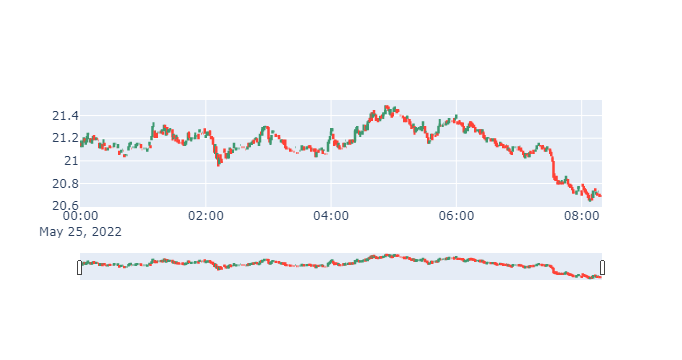

In [30]:
import plotly.graph_objects as go

def ms_to_time(ms):
    return datetime.fromtimestamp(int(ms/1000))

df_kline['Open_time'] = df_kline['Open_time'].apply(ms_to_time)


fig = go.Figure(data=[go.Candlestick(x=df_kline['Open_time'],
                open=df_kline['Open'],
                high=df_kline['High'],
                low =df_kline['Low'],
                close=df_kline['Close'])])

fig.show()